In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                        
import io
from matplotlib import cm

In [ ]:
from google.colab import files

uploaded_train = files.upload()

Saving test-Minimum-Error-Rate-Classifier.txt to test-Minimum-Error-Rate-Classifier (2).txt


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded_train['test-Minimum-Error-Rate-Classifier.txt']), sep=',', header=None)

dataset =dataset.to_numpy() ;

In [ ]:
min1 = [0,0]
min1=np.array(min1)
print(min1)
min2 = [2,2]
min2=np.array(min2)
sigma1 = [[.25,.3],[.3,1]]
sigma1=np.array(sigma1)
sigma2 = [[.5,0],[0,.5]]
sigma2=np.array(sigma2)


[0 0]


In [ ]:
prior1 = 0.5
prior2 = 0.5
a=np.zeros([6,3])
print(a)
print(dataset)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]]


In [ ]:
class1=[[]]
class2=[[]]
#testclasscon=[[x[2],0,0,0] for x in test]

In [ ]:
a[:,0]=dataset[:,0]
a[:,1]=dataset[:,1]


print(a)

[[ 1.   1.   0. ]
 [ 1.  -1.   0. ]
 [ 4.   5.   0. ]
 [-2.   2.5  0. ]
 [ 0.   2.   0. ]
 [ 2.  -3.   0. ]]


In [ ]:
prior1 = .5
prior2= .5
lista=[]
listb=[]

In [ ]:
b=[]
res1 = 0
res2 = 0
print(b)
for i in range(len(dataset)):
    
        res1 = -0.5*np.dot(np.dot((dataset[i,:]-min1).T,np.linalg.inv(sigma1)),(dataset[i,:]-min1))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma1))+np.log(prior1)
       
        lista.append(res1)
        res2 = -0.5*np.dot(np.dot((dataset[i,:]-min2).T,np.linalg.inv(sigma2)),(dataset[i,:]-min2))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma2))+np.log(prior2)
        listb.append(res2)
        
        if (res1 > res2):                                                                                                        
          b.append(1)
        else:
        
          b.append(2)
        
print(b)

[]
[1, 1, 2, 2, 1, 2]


In [ ]:
for i in range(len(b)):
    a[i][-1]=b[i]
print(a)
    

[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 0.   2.   1. ]
 [ 2.  -3.   2. ]]


In [ ]:
class1 =[([i[0],i[1],i[2]]) for i in a if i[2] == 1]
class1 = np.array(class1)
class2 =[([i[0],i[1],i[2]]) for i in a if i[2] == 2]
class2 = np.array(class2)
print(class1)
print(class2)

[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 0.  2.  1.]]
[[ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 2.  -3.   2. ]]


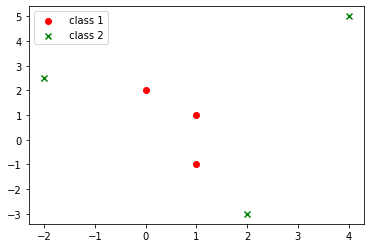

In [ ]:
fig = plt.figure()
plt.scatter(class1[:,0], class1[:,1], c = 'r', marker = 'o', label = ' class 1')
plt.scatter(class2[:,0], class2[:,1], c = 'g', marker = 'x', label = ' class 2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N



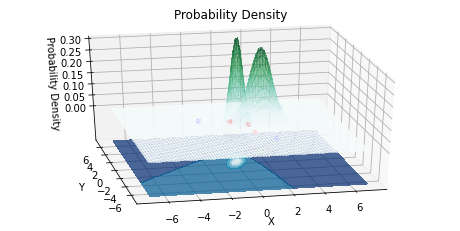

In [ ]:
#poltting
N = 80
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_gaussian(pos, min1, sigma1)

Z1 = multivariate_gaussian(pos, min2, sigma2)

db=(Z-Z1)
#print(type(db))
#db[:,:]=db[:,:]/40
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_figheight(4)
fig.set_figwidth(8)
z=0
ax.scatter(class1[:,0],class1[:,1],color='red',alpha=1)
ax.scatter(class2[:,0],class2[:,1],color='blue',alpha=1)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=False,
               cmap=cm.BuGn,alpha=.3)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=False,
                cmap=cm.BuGn,alpha=.3)
ax.contourf(X, Y, db, zdir='z', offset=-.15,cmap=cm.ocean,alpha=0.7)
ax.set_title('Probability Density')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_zlim(-0.15,.2)
ax.set_zticks(np.linspace(.30,0.0,7))
ax.view_init(30, -102)
plt.show()


